In [1]:
# Importing usefull lib
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

- Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Reading and Understanding the Data

In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- no null values in the data
- all data types looks fine except dteday which should be date and time

In [6]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [7]:
# renaming few columns for better readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
# categoring season column
def season_classifier(sea):
    if sea == 1:
        return "spring"
    elif sea == 2 :
        return "summer"
    elif sea == 3 :
        return "fall"
    elif sea == 4 :
        return "winter"
df['season'] = df['season'].apply(season_classifier)   

In [9]:
# Encoding/mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
# Encoding/mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [11]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data

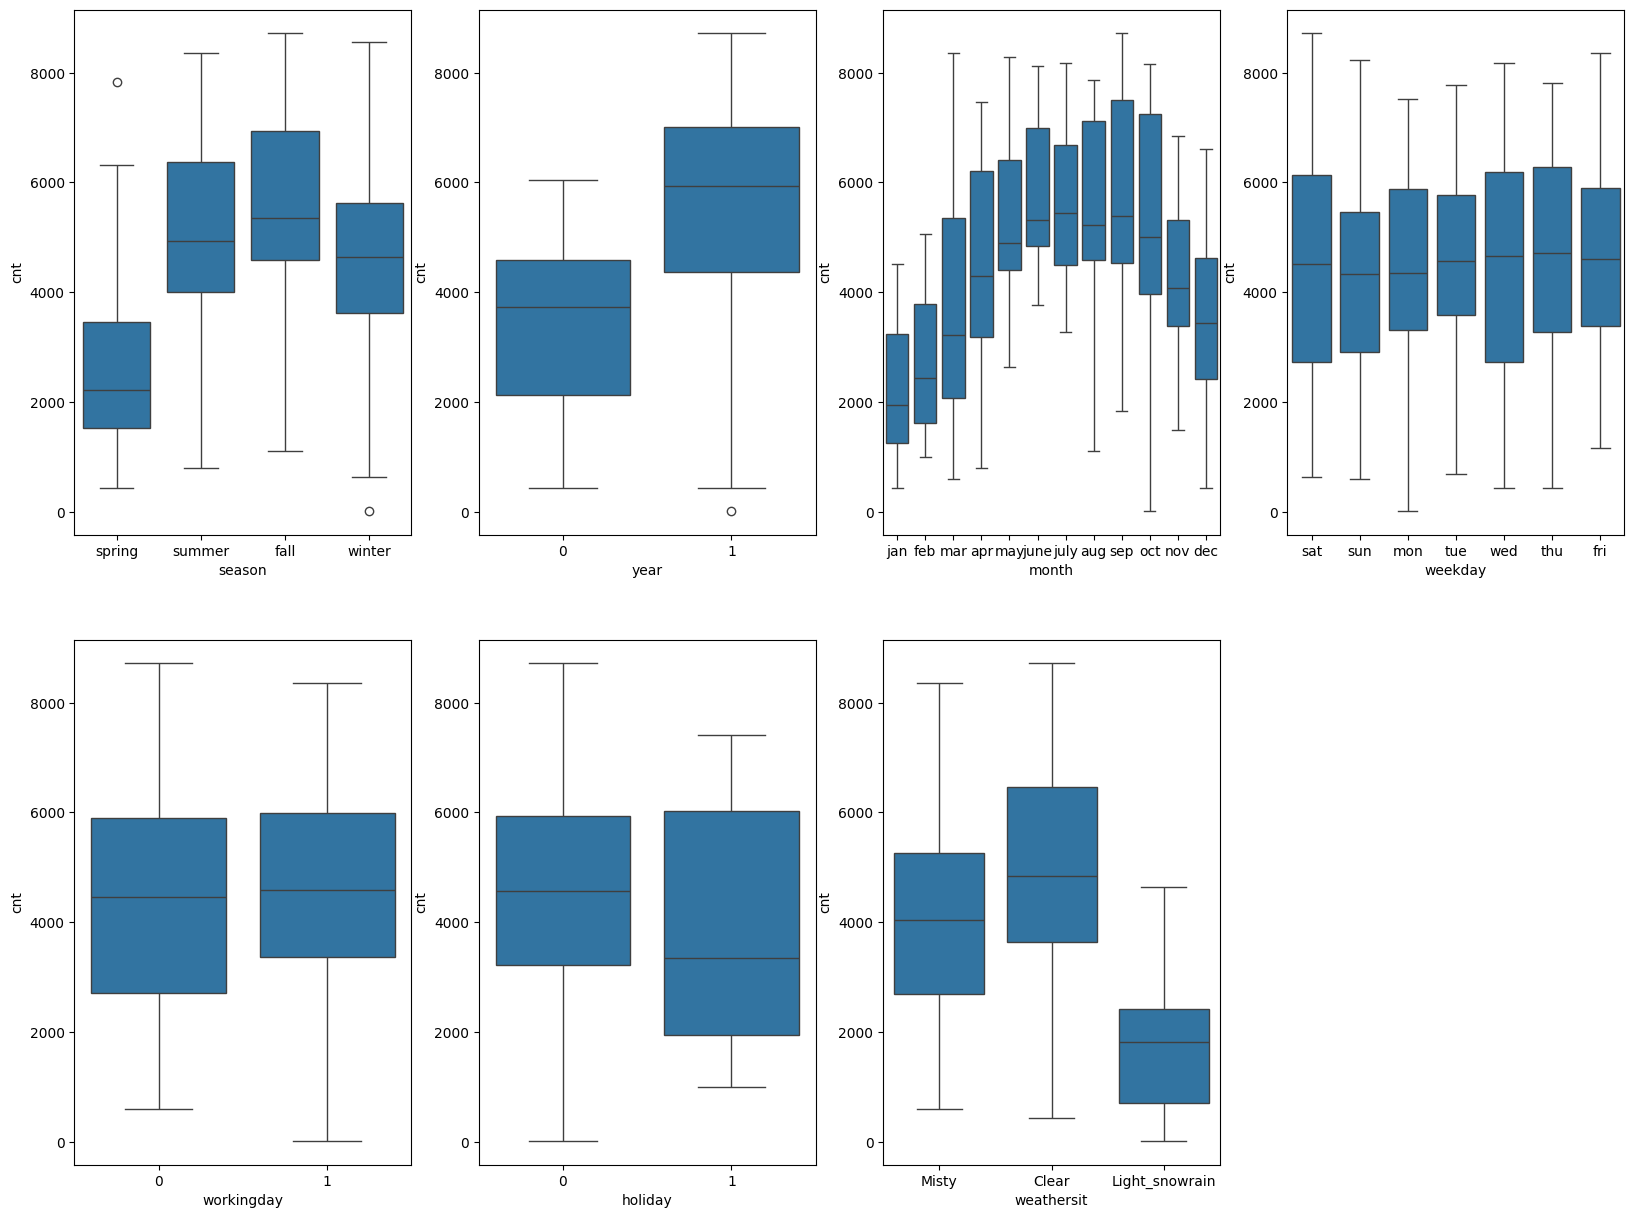

In [12]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize= (20, 15))
plt.subplot(2,4,1)
sns.boxplot(data = df, x = 'season',  y = 'cnt')
plt.subplot(2,4,2)
sns.boxplot(data = df, x = 'year',  y = 'cnt')
plt.subplot(2,4,3)
sns.boxplot(data = df, x = 'month',  y = 'cnt')
plt.subplot(2,4,4)
sns.boxplot(data = df, x = 'weekday',  y = 'cnt')
plt.subplot(2,4,5)
sns.boxplot(data= df, x = 'workingday',  y = 'cnt')
plt.subplot(2,4,6)
sns.boxplot(data = df, x = 'holiday',  y = 'cnt')
plt.subplot(2,4,7)
sns.boxplot(data = df, x = 'weathersit',  y = 'cnt')
plt.show()

In [13]:
# creating bar plot for categorical column

def cat_bar_plotter(col):
    plt.figure(figsize= (10,5))
    plt.subplot(1,2,1)
    sns.barplot(data = df, x = col, y = 'cnt')
    plt.subplot(1,2,2)
    sns.barplot(data = df, x = col, y = 'cnt', hue = 'year', palette= 'Set1')
    plt.show()

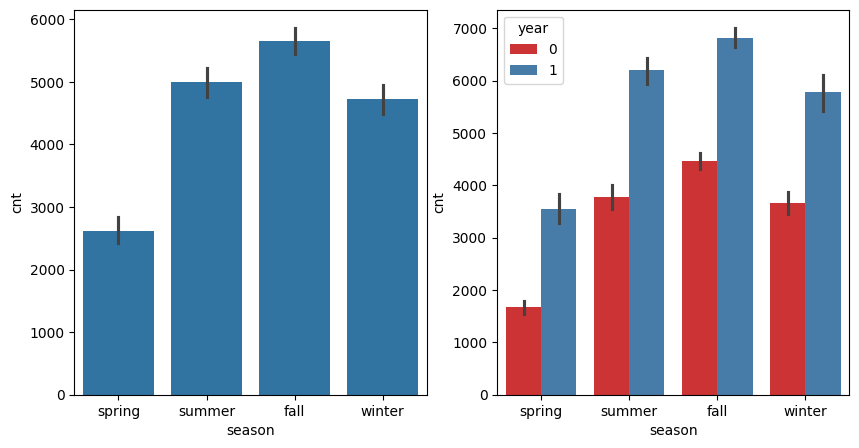

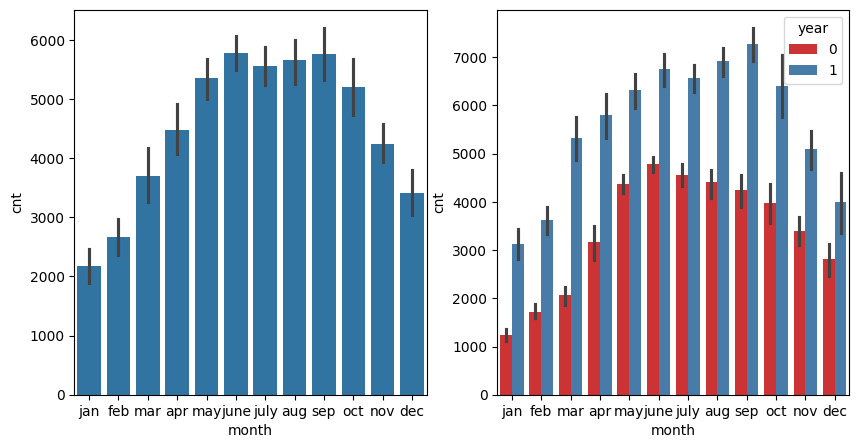

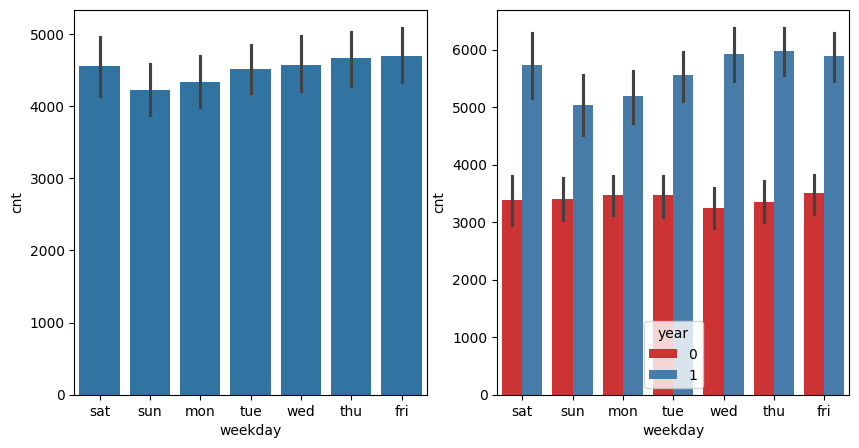

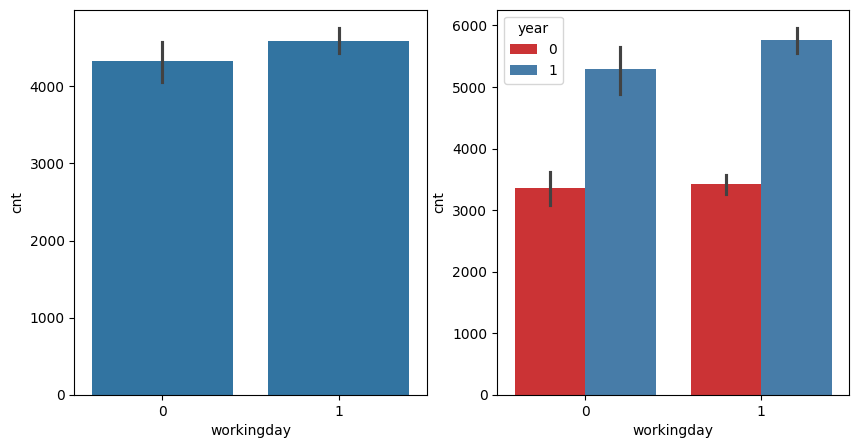

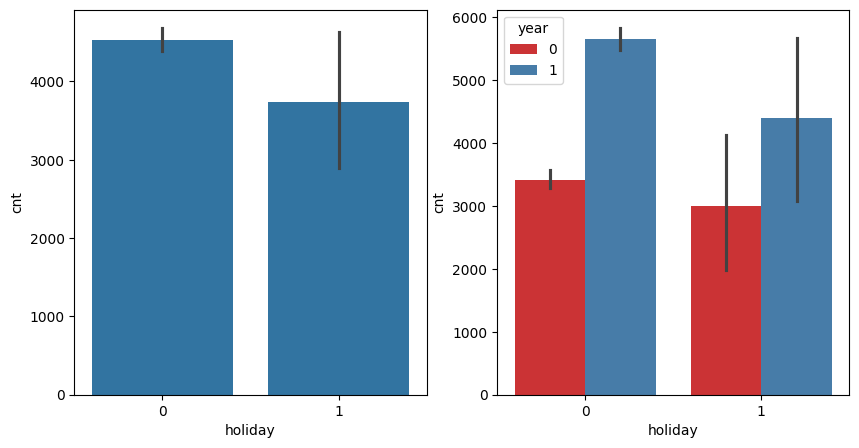

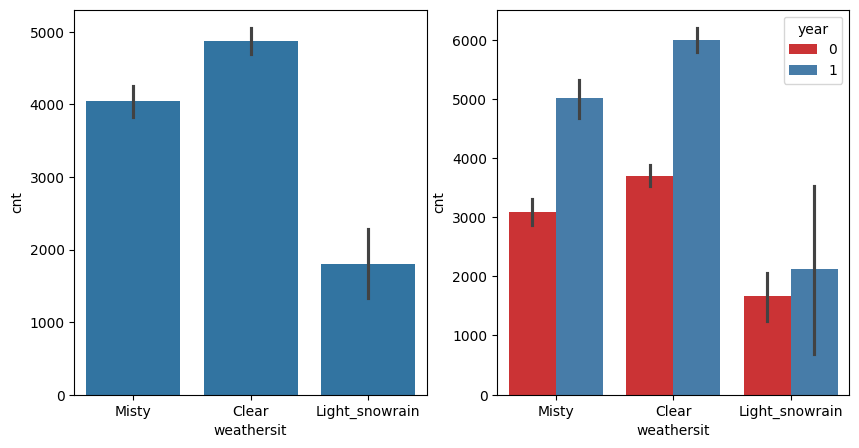

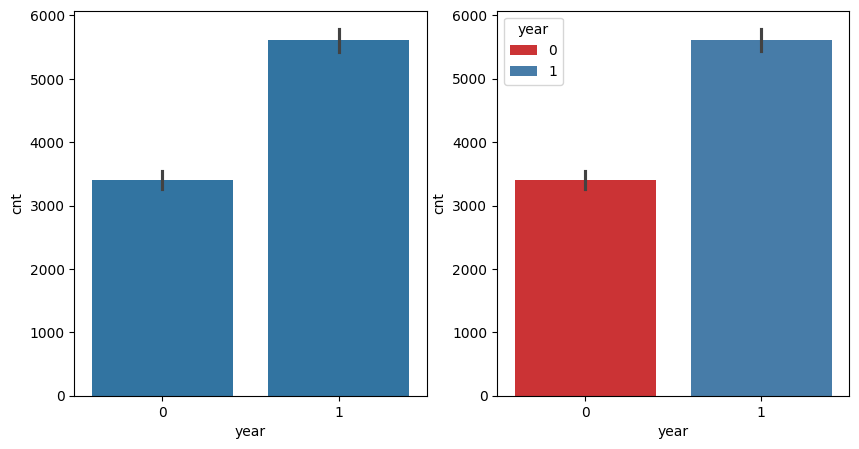

In [14]:
column = ['season','month','weekday','workingday','holiday','weathersit', 'year']

for i in column:
    cat_bar_plotter(i)

From the above it can be inferred as :
- fall and summer season attarct the most number of bike rents
- month may to oct attarct the most number of bike rents
- weekday and workday don't infer much to the bike renting
- people rent more bikes if there is no holiday
- clear weather is most loved weather for the bike rent
- year 2019 attarct more bike rents

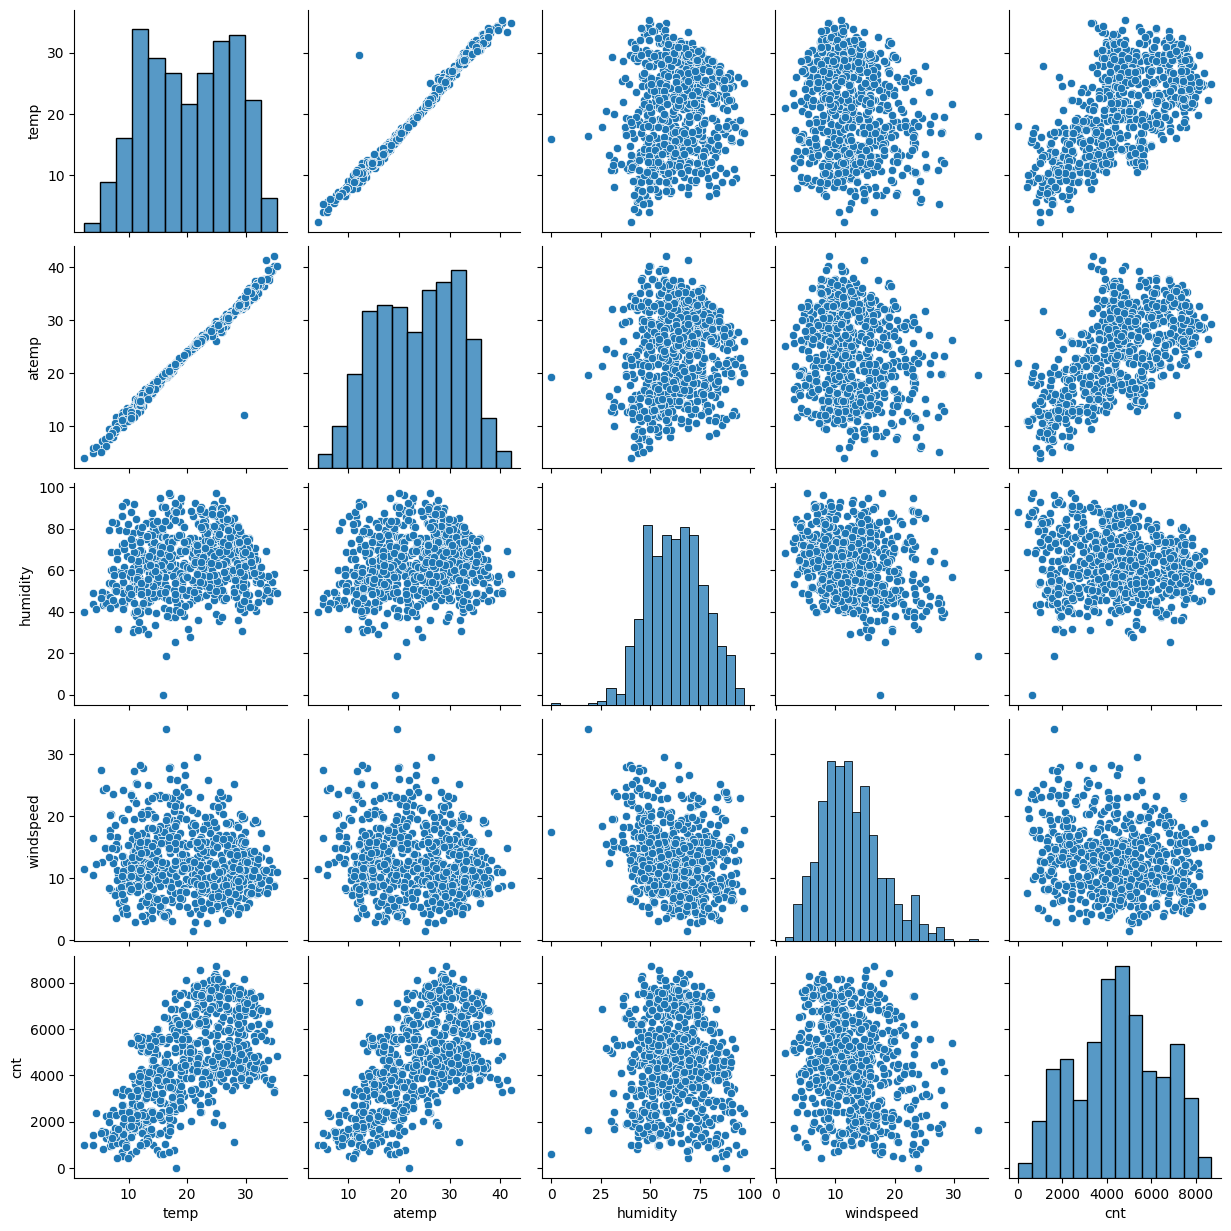

In [15]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

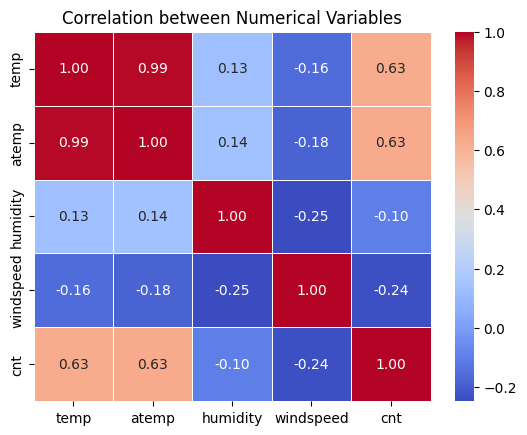

In [16]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
corr = df[num_vars].corr()
sns.heatmap(corr, annot= True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation between Numerical Variables")
plt.show()

- 63% of correlation exists for b/w temp and cnt
- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t   other variables   

In [17]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Data Preparation

In [18]:
# Dummy variable creation for month, weekday, weathersit and season variables.

dummy_df = pd.get_dummies(df[['month', 'weekday', 'weathersit', 'season']], drop_first= True, dtype= int)

In [19]:
# Merging  the dataframe, with the dummy variable dataset. 

# df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df_new = pd.concat([df,dummy_df],axis= 1 )

In [20]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [21]:
# dropping all the unwanted columns for which dummies are created:
df_new.drop(['season', 'weekday', 'weathersit', 'month'], axis= 1 , inplace= True)

### Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [22]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 42)

### Rescaling the Features 

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [25]:
# applying scaler to all numerical columns except dummy and categorical column
num_var = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt'] 
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [26]:
df_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,0,1,0,0,0,1,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,0,0,0,0,0,0,1,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,0,...,0,0,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,0,1,...,0,0,0,1,0,0,1,1,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,0,0,0,0,1,0,1,0,0,1


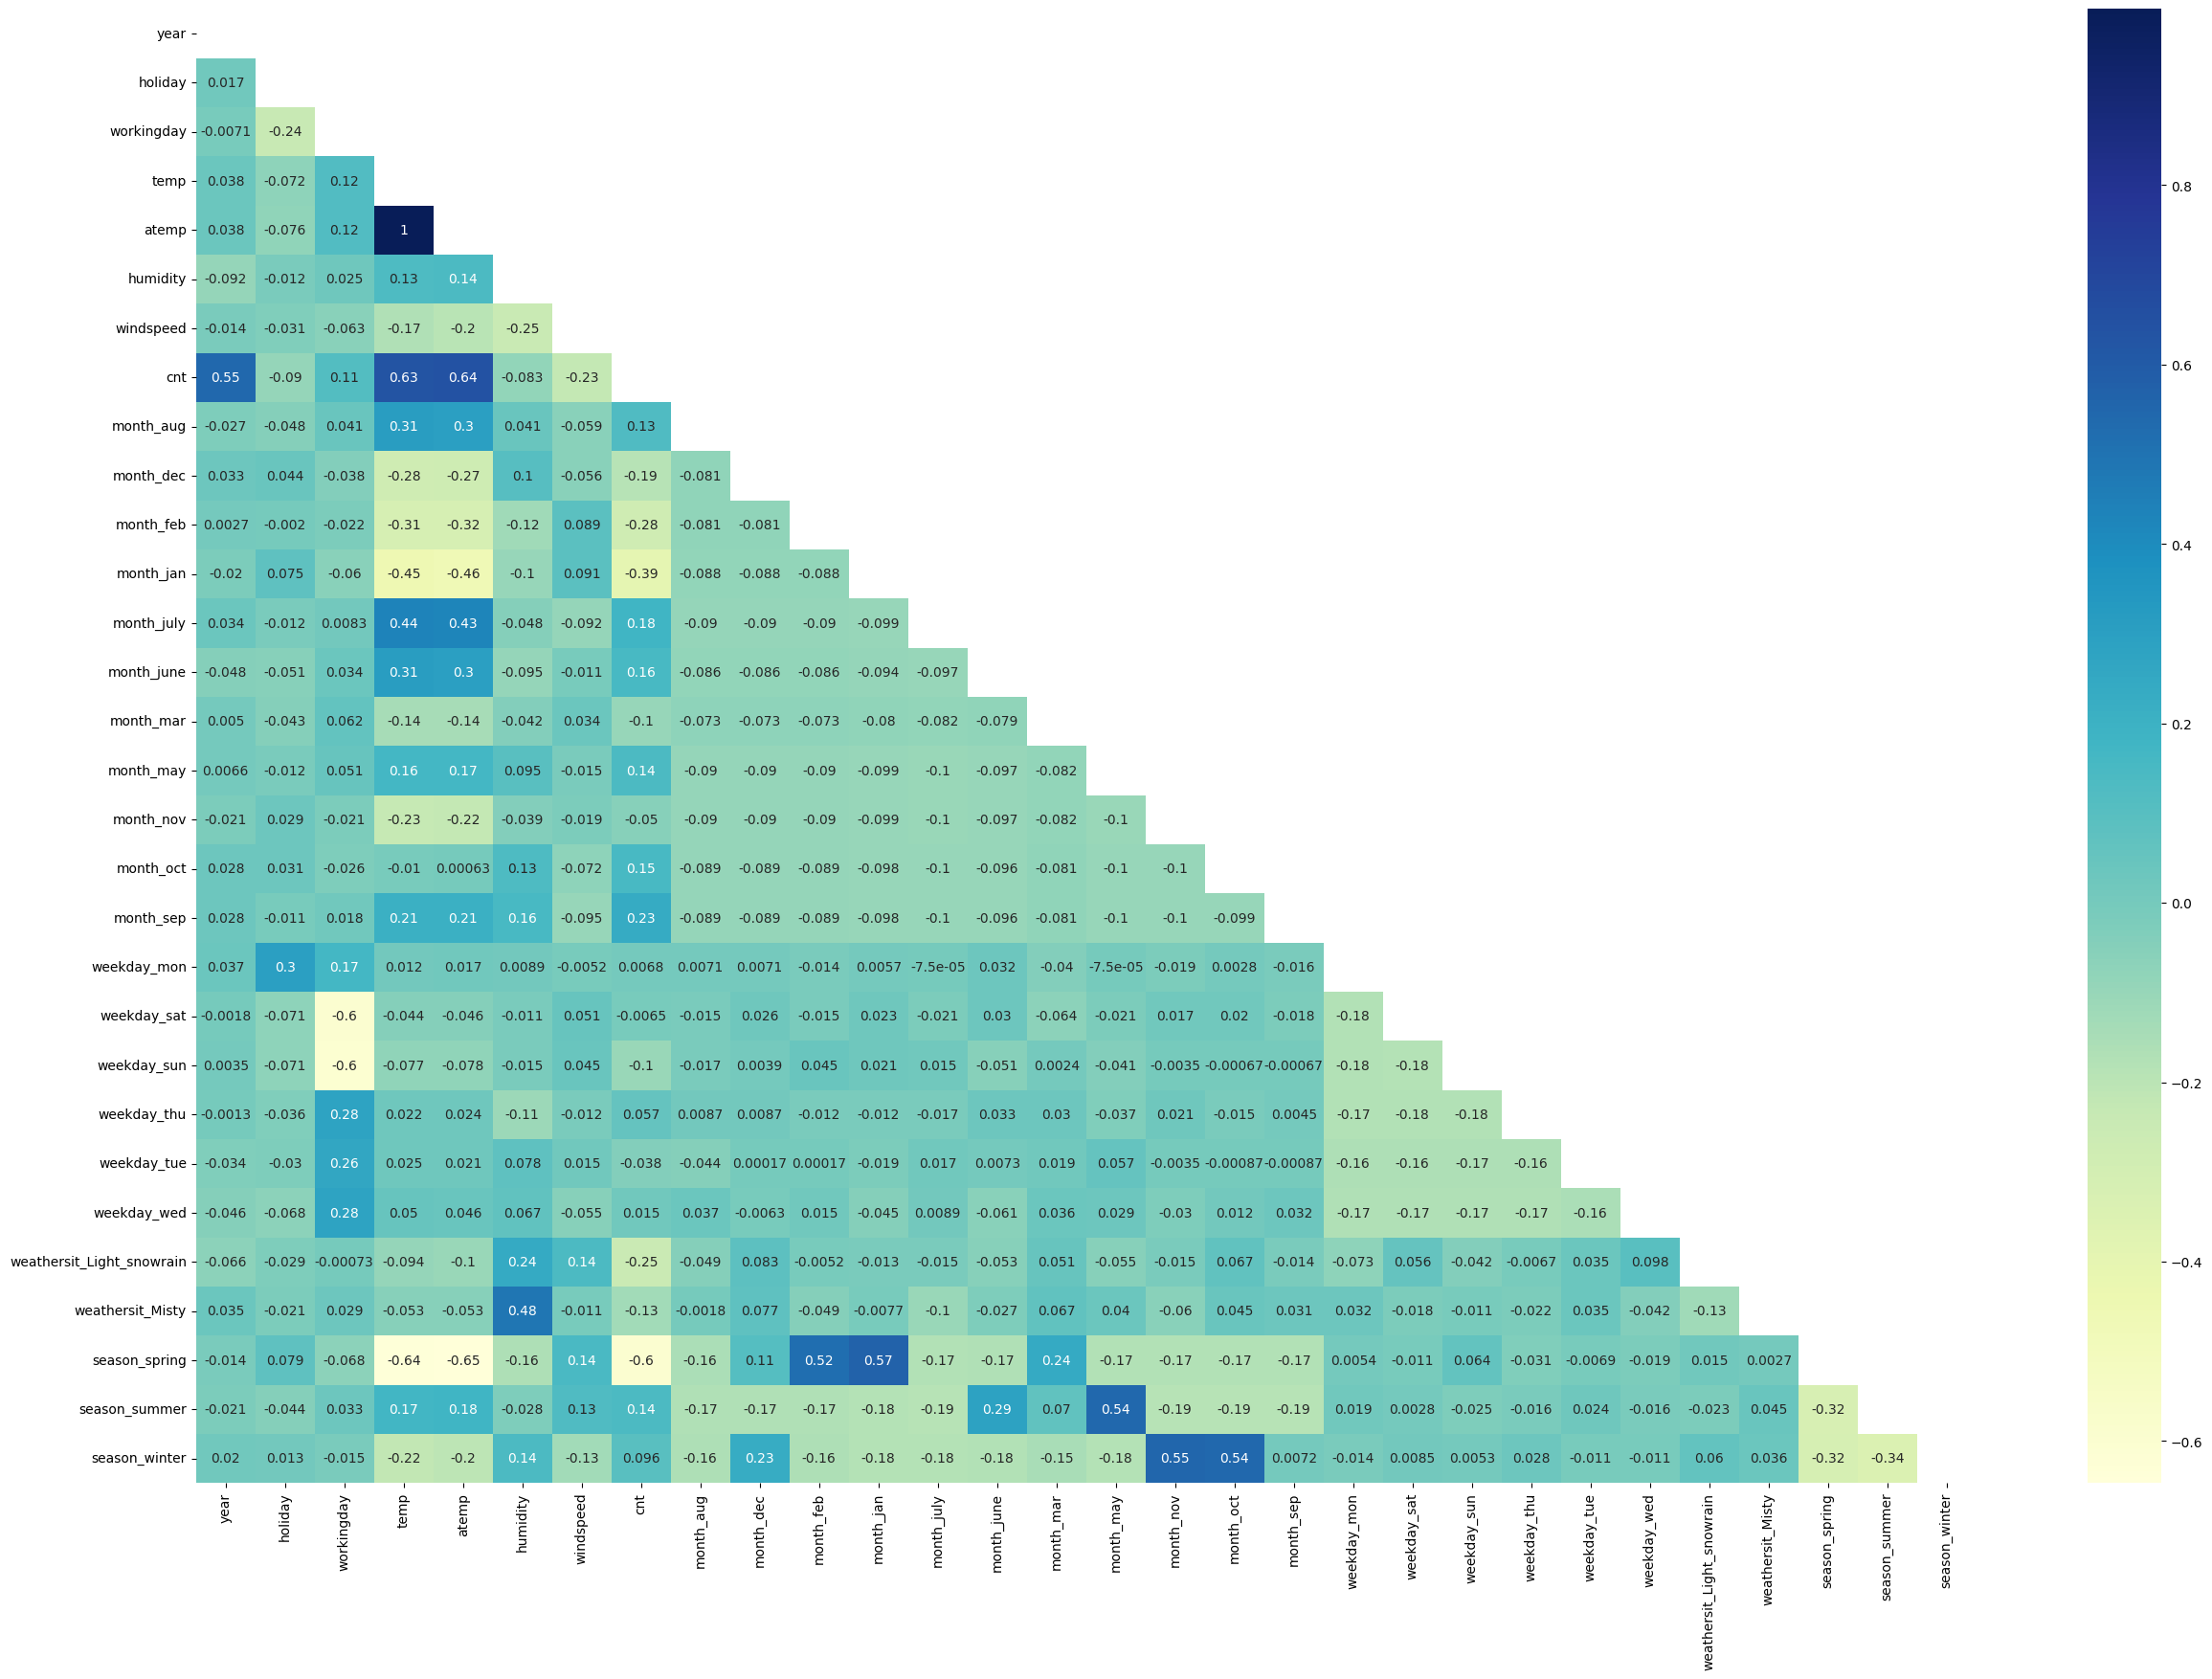

In [27]:
corr = df_train.corr()

# Step 2: Create a mask for the upper triangle
mask = np.triu(np.ones(corr.shape, dtype=bool))
plt.figure(figsize= (30,20))

sns.heatmap(corr, annot= True, cmap="YlGnBu", mask= mask)
plt.show()

- cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [28]:
# Building new data frames the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

### Step 5: Building a linear model
- First build model with only temp variable and analyse the r2 and r2 adjusted
- Add and check some more varibales to the model
- Now, add all variables to the model and check the r2 and adjusted r2
- Use manual method to eliminate the variables
- Use automated method to eliminate the variables (REF)
- Check mulitcolienarity using VIF and p-value approach

#### First model using temp variable

In [29]:
# adding constant to the model
X_train_sm = sm.add_constant(X_train['temp'])

# creating first model
lr = sm.OLS(y_train, X_train_sm)

# fitting the model
lr_model = lr.fit()

# params
lr_model.params


const    0.138950
temp     0.651899
dtype: float64

In [30]:
# checking the model summary

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     341.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.23e-58
Time:                        00:26:02   Log-Likelihood:                 148.76
No. Observations:                 510   AIC:                            -293.5
Df Residuals:                     508   BIC:                            -285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.021      6.603      0.000       0.098       0.180
temp           0.6519      0.035     18.467      0.000       0.583       0.721
==============================================================================
Omnibus:                       12.858   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.206
Skew:                           0.160   Prob(JB):                       0.0165
Kurtosis:                       2.467   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Very weak model as R2 and Adjusted R2 are very low i.e. 41.4% and 41.3 % respectively

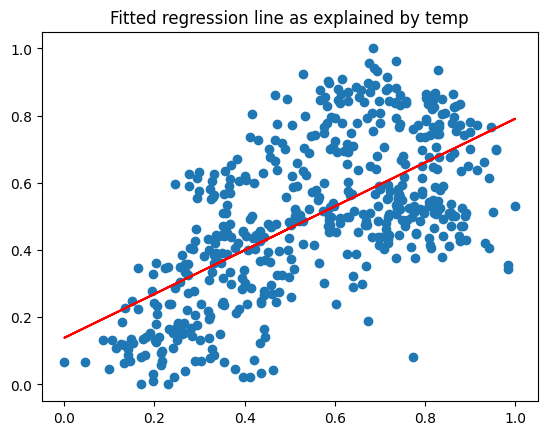

In [31]:
# Plotting line for the first liner regression model
plt.scatter(X_train_sm.iloc[:,1], y_train)
plt.plot(X_train_sm.iloc[:,1], 0.138950 + 0.651899 * X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

#### Adding 'yr'  variable to the model

In [32]:
X_train_sm = X_train[['temp', 'year']]
X_train_sm = sm.add_constant(X_train_sm)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.022676
temp     0.631446
year     0.244543
dtype: float64

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     525.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.59e-124
Time:                        00:26:14   Log-Likelihood:                 304.04
No. Observations:                 510   AIC:                            -602.1
Df Residuals:                     507   BIC:                            -589.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0227      0.017      1.372      0.171      -0.010       0.055
temp           0.6314      0.026     24.212      0.000       0.580       0.683
year           0.2445      0.012     20.618      0.000       0.221       0.268
==============================================================================
Omnibus:                       13.940   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.308
Skew:                          -0.393   Prob(JB):                     0.000782
Kurtosis:                       3.238   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const                        0.241018
year                         0.235660
holiday                      0.018310
workingday                   0.093129
temp                         0.185522
atemp                        0.274608
humidity                    -0.164098
windspeed                   -0.112761
month_aug                   -0.009145
month_dec                   -0.037882
month_feb                    0.017389
month_jan                    0.002321
month_july                  -0.041306
month_june                   0.002036
month_mar                    0.056413
month_may                    0.031779
month_nov                   -0.050506
month_oct                    0.038797
month_sep                    0.075944
weekday_mon                 -0.019801
weekday_sat                  0.088392
weekday_sun                  0.041188
weekday_thu                 -0.006796
weekday_tue                 -0.027804
weekday_wed                 -0.008707
weathersit_Light_snowrain   -0.227039
weathersit_M

In [35]:
#checking summary with all the variables
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     95.60
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          6.99e-177
Time:                        00:26:20   Log-Likelihood:                 497.64
No. Observations:                 510   AIC:                            -937.3
Df Residuals:                     481   BIC:                            -814.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2410      0.040      6.082      0.000       0.163       0.319
year                          0.2357      0.009     27.529      0.000       0.219       0.252
holiday                       0.0183      0.025      0.734      0.464      -0.031       0.067
workingday                    0.0931      0.014      6.747      0.000       0.066       0.120
temp                          0.1855      0.271      0.685      0.494      -0.346       0.717
atemp                         0.2746      0.278      0.989      0.323      -0.271       0.820
humidity                     -0.1641      0.041     -3.963      0.000      -0.245      -0.083
windspeed                    -0.1128      0.026     -4.276      0.000      -0.165      -0.061
month_aug                    -0.0091      0.036     -0.251      0.802      -0.081       0.062
month_dec                    -0.0379      0.037     -1.037      0.300      -0.110       0.034
month_feb                     0.0174      0.037      0.469      0.639      -0.055       0.090
month_jan                     0.0023      0.038      0.062      0.951      -0.072       0.076
month_july                   -0.0413      0.037     -1.131      0.259      -0.113       0.030
month_june                    0.0020      0.026      0.077      0.938      -0.050       0.054
month_mar                     0.0564      0.029      1.943      0.053      -0.001       0.113
month_may                     0.0318      0.022      1.472      0.142      -0.011       0.074
month_nov                    -0.0505      0.039     -1.306      0.192      -0.126       0.025
month_oct                     0.0388      0.038      1.021      0.308      -0.036       0.113
month_sep                     0.0759      0.034      2.263      0.024       0.010       0.142
weekday_mon                  -0.0198      0.016     -1.217      0.224      -0.052       0.012
weekday_sat                   0.0884      0.015      6.060      0.000       0.060       0.117
weekday_sun                   0.0412      0.015      2.759      0.006       0.012       0.071
weekday_thu                  -0.0068      0.016     -0.424      0.672      -0.038       0.025
weekday_tue                  -0.0278      0.016     -1.690      0.092      -0.060       0.005
weekday_wed                  -0.0087      0.016     -0.533      0.594      -0.041       0.023
weathersit_Light_snowrain    -0.2270      0.029     -7.913      0.000      -0.283      -0.171
weathersit_Misty             -0.0583      0.011     -5.227      0.000      -0.080      -0.036
season_spring                -0.1472      0.033     -4.513      0.000      -0.211      -0.083
season_summer                 0.0112      0.027      0.412      0.680      -0.042       0.065
season_winter                 0.0768      0.028      2.769      0.006      

- R-squared is now .853 which means 85% of the variance in the count quantity is explained with all the variables



#### Using RFE (automated approach):
- We have found out the R-squared values and the best fit lines using the manual approach for feature selection. We will now using the automated approach for selecting the values required for building the most optimized models and dropping the values which are redundant for our model building approach. We will now use RFE for automated approach, along with VIF to determine the variables to drop.

In [36]:
# creating model for rfe
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [37]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,year
26,1,True,season_spring
25,1,True,weathersit_Misty
24,1,True,weathersit_Light_snowrain
20,1,True,weekday_sun
19,1,True,weekday_sat
15,1,True,month_nov
11,1,True,month_july
28,1,True,season_winter
1,1,True,holiday


In [38]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features


array(['year', 'season_spring', 'weathersit_Misty',
       'weathersit_Light_snowrain', 'weekday_sun', 'weekday_sat',
       'month_nov', 'month_july', 'season_winter', 'holiday',
       'workingday', 'windspeed', 'month_dec', 'humidity', 'atemp'],
      dtype=object)

In [39]:
#building model using selected RFE variables
#creating training set with RFE selected variables
X_train_rfe = X_train[selected_features]

In [40]:
# adding constant to new model varibales

X_train_rfe = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_rfe)

# fitting the model
lr_model = lr.fit()

lr_model.params

const                        0.248778
year                         0.238777
season_spring               -0.153384
weathersit_Misty            -0.057697
weathersit_Light_snowrain   -0.222379
weekday_sun                  0.051022
weekday_sat                  0.095732
month_nov                   -0.091838
month_july                  -0.068805
season_winter                0.089901
holiday                      0.011412
workingday                   0.090612
windspeed                   -0.115818
month_dec                   -0.074118
humidity                    -0.151461
atemp                        0.471780
dtype: float64

In [41]:
# summary of the new model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.27e-185
Time:                        00:26:35   Log-Likelihood:                 481.75
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     495   BIC:                            -870.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2488      0.030      8.365      0.000       0.190       0.307
year                          0.2388      0.009     27.780      0.000       0.222       0.256
season_spring                -0.1534      0.017     -9.000      0.000      -0.187      -0.120
weathersit_Misty             -0.0577      0.011     -5.185      0.000      -0.080      -0.036
weathersit_Light_snowrain    -0.2224      0.029     -7.788      0.000      -0.278      -0.166
weekday_sun                   0.0510      0.013      4.006      0.000       0.026       0.076
weekday_sat                   0.0957      0.013      7.614      0.000       0.071       0.120
month_nov                    -0.0918      0.019     -4.807      0.000      -0.129      -0.054
month_july                   -0.0688      0.017     -4.119      0.000      -0.102      -0.036
season_winter                 0.0899      0.014      6.242      0.000       0.062       0.118
holiday                       0.0114      0.022      0.517      0.605      -0.032       0.055
workingday                    0.0906      0.010      8.706      0.000       0.070       0.111
windspeed                    -0.1158      0.025     -4.601      0.000      -0.165      -0.066
month_dec                    -0.0741      0.018     -4.092      0.000      -0.110      -0.039
humidity                     -0.1515      0.040     -3.768      0.000      -0.230      -0.072
atemp                         0.4718      0.037     12.591      0.000       0.398       0.545
==============================================================================
Omnibus:                       72.617   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.932
Skew:                          -0.733   Prob(JB):                     1.40e-39
Kurtosis:                       5.505   Cond. No.                     8.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Need to check the multicollinearity

In [42]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [43]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,workingday,50.80
4,weekday_sun,12.41
5,weekday_sat,12.03
14,atemp,3.56
9,holiday,3.05
1,season_spring,2.89
8,season_winter,2.18
13,humidity,1.86
6,month_nov,1.71
2,weathersit_Misty,1.57


How to check the conditions for variables elimination?
Here are some of the potential conditions which can be helpful while deciding which variables to check. These conditions are formulated after studying the VIF, p-values and going through the course content.

High p-value, high VIF : definitely drop

High-Low:

High p, low VIF : remove these first, then build model again and check VIF again
Low p, high VIF : remove these later
Low p-value, low VIF : keep variable

In [44]:
# workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis = 1)

In [45]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          3.27e-185
Time:                        00:26:47   Log-Likelihood:                 481.75
No. Observations:                 510   AIC:                            -933.5
Df Residuals:                     495   BIC:                            -870.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3394      0.037      9.208      0.000       0.267       0.412
year                          0.2388      0.009     27.780      0.000       0.222       0.256
season_spring                -0.1534      0.017     -9.000      0.000      -0.187      -0.120
weathersit_Misty             -0.0577      0.011     -5.185      0.000      -0.080      -0.036
weathersit_Light_snowrain    -0.2224      0.029     -7.788      0.000      -0.278      -0.166
weekday_sun                  -0.0396      0.012     -3.269      0.001      -0.063      -0.016
weekday_sat                   0.0051      0.012      0.422      0.673      -0.019       0.029
month_nov                    -0.0918      0.019     -4.807      0.000      -0.129      -0.054
month_july                   -0.0688      0.017     -4.119      0.000      -0.102      -0.036
season_winter                 0.0899      0.014      6.242      0.000       0.062       0.118
holiday                      -0.0792      0.026     -3.018      0.003      -0.131      -0.028
windspeed                    -0.1158      0.025     -4.601      0.000      -0.165      -0.066
month_dec                    -0.0741      0.018     -4.092      0.000      -0.110      -0.039
humidity                     -0.1515      0.040     -3.768      0.000      -0.230      -0.072
atemp                         0.4718      0.037     12.591      0.000       0.398       0.545
==============================================================================
Omnibus:                       72.617   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.932
Skew:                          -0.733   Prob(JB):                     1.40e-39
Kurtosis:                       5.505   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [47]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,humidity,25.22
13,atemp,17.35
10,windspeed,5.06
8,season_winter,2.72
1,season_spring,2.64
2,weathersit_Misty,2.24
0,year,2.09
6,month_nov,1.81
7,month_july,1.43
11,month_dec,1.35


In [48]:
#Sat variable can be dropped due to low VIF and high p-value
X_train_new_2 = X_train_lr1.drop(['weekday_sat'], axis = 1)

In [49]:
#adding constant to training variable
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.49e-186
Time:                        00:27:13   Log-Likelihood:                 481.65
No. Observations:                 510   AIC:                            -935.3
Df Residuals:                     496   BIC:                            -876.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3408      0.037      9.292      0.000       0.269       0.413
year                          0.2388      0.009     27.807      0.000       0.222       0.256
season_spring                -0.1538      0.017     -9.047      0.000      -0.187      -0.120
weathersit_Misty             -0.0578      0.011     -5.201      0.000      -0.080      -0.036
weathersit_Light_snowrain    -0.2221      0.029     -7.788      0.000      -0.278      -0.166
weekday_sun                  -0.0406      0.012     -3.415      0.001      -0.064      -0.017
month_nov                    -0.0918      0.019     -4.810      0.000      -0.129      -0.054
month_july                   -0.0687      0.017     -4.116      0.000      -0.101      -0.036
season_winter                 0.0897      0.014      6.237      0.000       0.061       0.118
holiday                      -0.0802      0.026     -3.069      0.002      -0.131      -0.029
windspeed                    -0.1154      0.025     -4.592      0.000      -0.165      -0.066
month_dec                    -0.0740      0.018     -4.089      0.000      -0.110      -0.038
humidity                     -0.1513      0.040     -3.767      0.000      -0.230      -0.072
atemp                         0.4706      0.037     12.604      0.000       0.397       0.544
==============================================================================
Omnibus:                       71.439   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.127
Skew:                          -0.721   Prob(JB):                     5.68e-39
Kurtosis:                       5.492   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr2 = X_train_lr2.drop(['const'], axis = 1)

In [51]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,humidity,25.04
12,atemp,17.34
9,windspeed,5.00
7,season_winter,2.72
1,season_spring,2.63
2,weathersit_Misty,2.24
0,year,2.09
5,month_nov,1.81
6,month_july,1.43
10,month_dec,1.35


In [52]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['humidity'], axis = 1)

In [53]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.80e-184
Time:                        00:27:30   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -922.9
Df Residuals:                     497   BIC:                            -867.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2555      0.029      8.740      0.000       0.198       0.313
year                          0.2432      0.009     28.223      0.000       0.226       0.260
season_spring                -0.1570      0.017     -9.123      0.000      -0.191      -0.123
weathersit_Misty             -0.0819      0.009     -8.883      0.000      -0.100      -0.064
weathersit_Light_snowrain    -0.2669      0.026    -10.162      0.000      -0.319      -0.215
weekday_sun                  -0.0427      0.012     -3.554      0.000      -0.066      -0.019
month_nov                    -0.0916      0.019     -4.734      0.000      -0.130      -0.054
month_july                   -0.0618      0.017     -3.675      0.000      -0.095      -0.029
season_winter                 0.0838      0.014      5.786      0.000       0.055       0.112
holiday                      -0.0826      0.026     -3.120      0.002      -0.135      -0.031
windspeed                    -0.0881      0.024     -3.614      0.000      -0.136      -0.040
month_dec                    -0.0785      0.018     -4.289      0.000      -0.114      -0.043
atemp                         0.4415      0.037     11.929      0.000       0.369       0.514
==============================================================================
Omnibus:                       70.892   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.545
Skew:                          -0.703   Prob(JB):                     3.79e-40
Kurtosis:                       5.562   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [55]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,windspeed,4.96
11,atemp,4.94
7,season_winter,2.38
0,year,2.09
5,month_nov,1.77
1,season_spring,1.74
2,weathersit_Misty,1.56
6,month_july,1.37
10,month_dec,1.31
4,weekday_sun,1.20


In [56]:
#windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['windspeed'], axis = 1)

In [57]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          7.29e-183
Time:                        00:29:02   Log-Likelihood:                 467.84
No. Observations:                 510   AIC:                            -911.7
Df Residuals:                     498   BIC:                            -860.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2017      0.025      7.921      0.000       0.152       0.252
year                          0.2428      0.009     27.838      0.000       0.226       0.260
season_spring                -0.1511      0.017     -8.719      0.000      -0.185      -0.117
weathersit_Misty             -0.0819      0.009     -8.778      0.000      -0.100      -0.064
weathersit_Light_snowrain    -0.2793      0.026    -10.594      0.000      -0.331      -0.227
weekday_sun                  -0.0442      0.012     -3.637      0.000      -0.068      -0.020
month_nov                    -0.0919      0.020     -4.697      0.000      -0.130      -0.053
month_july                   -0.0605      0.017     -3.558      0.000      -0.094      -0.027
season_winter                 0.0931      0.014      6.449      0.000       0.065       0.121
holiday                      -0.0793      0.027     -2.963      0.003      -0.132      -0.027
month_dec                    -0.0731      0.018     -3.961      0.000      -0.109      -0.037
atemp                         0.4678      0.037     12.736      0.000       0.396       0.540
==============================================================================
Omnibus:                       73.717   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.475
Skew:                          -0.717   Prob(JB):                     2.17e-43
Kurtosis:                       5.681   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr4 = X_train_lr4.drop(['const'], axis = 1)

In [59]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,atemp,2.78
7,season_winter,2.38
0,year,2.08
5,month_nov,1.73
2,weathersit_Misty,1.55
1,season_spring,1.34
6,month_july,1.34
9,month_dec,1.31
4,weekday_sun,1.18
3,weathersit_Light_snowrain,1.06


In [61]:
#July is dropped because of low VIF and the p-value
X_train_new_5 = X_train_lr4.drop(['month_july'], axis = 1)

In [62]:
#adding constant to training variable
X_train_lr5 = sm.add_constant(X_train_new_5)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_lr5)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.3
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.35e-181
Time:                        00:30:14   Log-Likelihood:                 461.44
No. Observations:                 510   AIC:                            -900.9
Df Residuals:                     499   BIC:                            -854.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2231      0.025      8.909      0.000       0.174       0.272
year                          0.2421      0.009     27.446      0.000       0.225       0.259
season_spring                -0.1585      0.017     -9.102      0.000      -0.193      -0.124
weathersit_Misty             -0.0795      0.009     -8.450      0.000      -0.098      -0.061
weathersit_Light_snowrain    -0.2833      0.027    -10.632      0.000      -0.336      -0.231
weekday_sun                  -0.0467      0.012     -3.806      0.000      -0.071      -0.023
month_nov                    -0.0987      0.020     -5.009      0.000      -0.137      -0.060
season_winter                 0.0967      0.015      6.643      0.000       0.068       0.125
holiday                      -0.0810      0.027     -2.992      0.003      -0.134      -0.028
month_dec                    -0.0782      0.019     -4.203      0.000      -0.115      -0.042
atemp                         0.4203      0.035     12.142      0.000       0.352       0.488
==============================================================================
Omnibus:                       80.318   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.014
Skew:                          -0.789   Prob(JB):                     6.77e-46
Kurtosis:                       5.701   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr5.drop(['const'], axis = 1)

In [64]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,season_winter,2.30
9,atemp,2.28
0,year,2.07
5,month_nov,1.73
2,weathersit_Misty,1.52
1,season_spring,1.32
8,month_dec,1.31
4,weekday_sun,1.18
3,weathersit_Light_snowrain,1.06
7,holiday,1.05


##### Several points to be noted as we select this model as the final model:
1) The model selection depends on several factor such as the p-value, the VIF and the R-squared value. The p-value gives us input on the significance of the variables, the VIF about the correaltion between the participating variables and the R-squared value gives us an indication about the strength of the model. This value defines the percentage of the variance in the dependent variable that the independent variables explain collectively.

2) The low (<0.05) or almost zero p-value of all the selected variables enables us to reject the null hypothesis.

3) The VIF should be generally <5 and we have achieved that condition with all the variables.

4) The R-squared value achieved is 82.4% which suggests a high correlation between the dependent variable (count) and the independent variables and the variables selected accurately help us map the variance of the dependent variable ie count.

### Step 6: Residual analysis

In [65]:
X_train_lr5 = sm.add_constant(X_train_lr5)
#X_train_lm5.columns
X_train_lr5

,const,year,season_spring,weathersit_Misty,weathersit_Light_snowrain,weekday_sun,month_nov,season_winter,holiday,month_dec,atemp
683,1.0,1,0,1,0,0,1,1,0,0,0.322150
645,1.0,1,0,1,0,0,0,1,1,0,0.404998
163,1.0,0,0,0,0,0,0,0,0,0,0.685963
360,1.0,0,1,1,0,0,0,0,0,1,0.326273
640,1.0,1,0,1,0,0,0,1,0,0,0.682653
...,...,...,...,...,...,...,...,...,...,...,...
700,1.0,1,0,1,0,1,0,1,0,1,0.367719
71,1.0,0,1,0,0,1,0,0,0,0,0.395131
106,1.0,0,0,0,0,1,0,0,0,0,0.481247
270,1.0,0,0,1,0,0,0,1,0,0,0.651183


In [66]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr5)

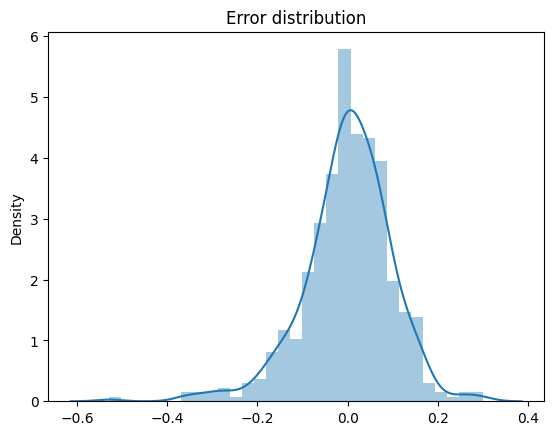

In [67]:
res = y_train - y_train_pred
#distribution of the error terms shown here; distribution should be centered around 0 and should be a normal distribution
sns.distplot(res)
plt.title('Error distribution')
plt.show()

In [69]:
#perform standardization (MinMax scaling) on test set
#checking the variables to be standardized
num_var

['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

In [71]:
#perform scaling on test data set
#train dataset is to be fit, test dataset is not fit but simply transformed
#test dataset is transformed based on fit of train dataset
df_test[num_var] = scaler.transform(df_test[num_var])

In [72]:
#building test model using the variable temp
#preparing the variables for model building 

y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
#dropping constant
X_train_lr5.drop(columns= 'const', inplace = True)

In [74]:
#creating new X_test dataset based on the feature variables using RFE
X_test_new = X_test[X_train_lr5.columns]

#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [75]:
#making predictions
y_pred = lr_model.predict(X_test_new)

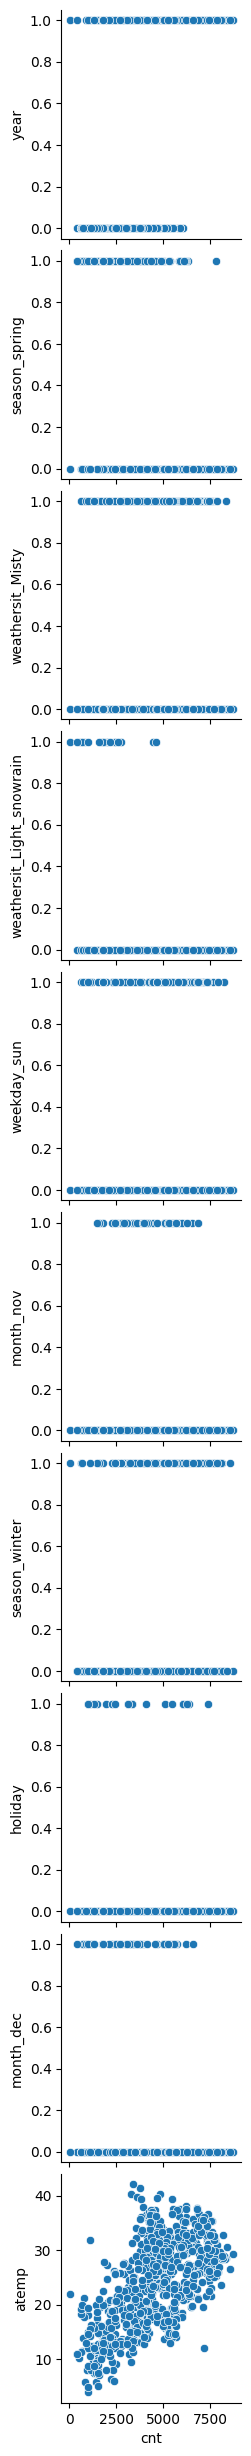

<Figure size 1600x1200 with 0 Axes>

In [77]:
#build a scatter plot to observe relationship between the dependent and the feature variables

sns.pairplot(df_new, y_vars=X_train_lr5.columns, x_vars='cnt')
plt.figure(figsize = (16, 12))
plt.show()

We can now validate the assumptions of linear regression in the model:
As we can see, temperature has a linear relationship with the dependent variable (cnt).

As we have observed earlier every variable in our chosen model has a VIF<5 which ensures that there is no mulitcollinearity.

The error distribution as observed above is normal (ie concentrated around 0) which is another assumption of linear regression.

### Step 7: Prediction and evaluation of the test set

In [78]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.808476513642886


In [79]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8244469685115138


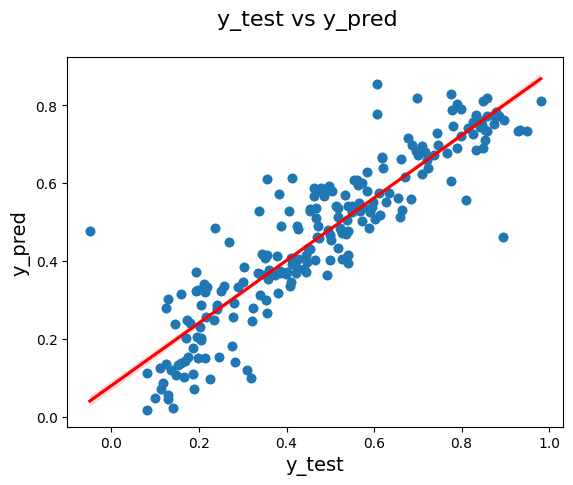

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 14) 
plt.show()

In [81]:
#finding out the mean squared error 

train_mse = (mean_squared_error(y_true=y_train, y_pred=y_train_pred))
test_mse = (mean_squared_error(y_true=y_test, y_pred=y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.009585961674918054
Mean squared error of the test set is 0.010358246268765074


- Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets

### Summary:
The summary of the model after data interpretation, visualisation, data-preparation, model building and training, residual analysis and evaluation of test model are as follows-

The R-squared value of the train set is 82.71% whereas the test set has a value of 81.13% which suggests that our model broadly explains the variance quite accurately on the test set and thus we can conclude that it is a good model.

Our developed model's mean squared error is almost 0 on both the training and testing datasets which suggests that the variance is accurately predicted on the test set. The p-values and VIF were used to select the significant variables. RFE was also conducted for automated selection of variables.

We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature and whether it is a workingday or not. Additionally more rentals seem to be demanded on the winters as compared to the summer and spring. We had observed that the months of September and October had higher use of rentals. In terms of days the maximum focus was on days like Wed, Thurs and Sat and more on holidays.

These interpretations help us derive meaningful insights in the bike rental market and the behaviour of the people. One of the recommendations based on this model are that there should be aggressive marketing in the summer and spring season to drive up rentals. Since the summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers. There has to be an approach required to introduce more users on days where the weather is less clear, perhaps with incentives or strategic deals. Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.